# Fit the rsEGFP WT

In [1]:
import pandas as pd

exp_data = pd.read_csv("DATA/prot1 ON2OFF.csv")

exp_data

,timestamp,cycle,type,186.85486,187.31995223015844,187.78500323297956,188.250012996982,188.71498151068454,189.17990876260572,189.64479474126426,...,1032.9632529736894,1033.3204920667242,1033.6776665334785,1034.034776362471,1034.3918215422202,1034.7488020612445,1035.1057179080635,1035.4625690711953,1035.8193555391586,1036.176077300472
0,2025-04-04 13:05:43.323760,1,zero,16.990556,24978.543889,59.831028,47.330833,62.015528,71.481694,76.942944,...,470.274306,455.953694,458.259556,465.662583,459.958611,461.657667,467.847083,466.512111,466.512111,466.512111
1,2025-04-04 13:06:24.439856,1,on,16.990556,24978.543889,60.195111,42.233667,55.097944,67.234056,57.525167,...,457.774111,464.084889,463.114000,457.288667,441.511722,455.346889,469.182056,456.560500,456.560500,456.560500
2,2025-04-04 13:06:25.472725,1,on,16.990556,24978.543889,57.174568,48.544444,41.802160,43.150617,67.692531,...,453.081481,459.554074,460.632840,454.429938,472.229568,473.038642,461.981296,435.821235,435.821235,435.821235
3,2025-04-04 13:06:26.506516,1,on,16.990556,24978.543889,74.030278,60.437833,58.981500,54.369778,53.641611,...,462.871278,474.036500,470.881111,459.230444,455.346889,477.434611,456.075056,451.463333,451.463333,451.463333
4,2025-04-04 13:06:27.537642,1,on,16.990556,24978.543889,55.826111,47.195988,54.207963,80.907407,69.850062,...,471.690185,486.523210,459.823765,473.847716,457.126852,462.520679,440.945370,446.878580,446.878580,446.878580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2025-04-04 13:13:02.957585,1,on,16.990556,24978.543889,34.250802,37.756790,59.601790,63.916852,55.826111,...,435.281852,464.138827,449.575494,446.878580,447.957346,459.554074,450.384568,449.845185,449.845185,449.845185
387,2025-04-04 13:13:03.987853,1,on,16.990556,24978.543889,58.792716,15.372407,35.599259,54.747346,83.604321,...,463.599444,464.138827,464.138827,454.969321,460.363148,433.124321,450.923951,447.417963,447.417963,447.417963
388,2025-04-04 13:13:05.020339,1,on,16.990556,24978.543889,30.475123,42.880926,57.983642,69.040988,55.017037,...,471.150802,478.432469,456.048086,444.990741,465.217593,461.172222,452.002716,445.260432,445.260432,445.260432
389,2025-04-04 13:13:06.054197,1,on,16.990556,24978.543889,53.129198,22.923765,36.678025,38.835556,69.580370,...,438.248457,441.754444,446.339198,457.396543,455.239012,449.305802,435.281852,457.935926,457.935926,457.935926


In [2]:
import numpy as np

intensities=np.array(exp_data[(exp_data["type"] != "zero") & (exp_data["type"] != "static")].iloc[:, 3:], dtype=np.float64)
static=np.array(exp_data[(exp_data["type"]== "static")].iloc[:, 3:], dtype=np.float64)[0]
zero=np.array(exp_data[(exp_data["type"]== "zero")].iloc[:, 3:], dtype=np.float64)[0]
wavelengths = np.array(exp_data.columns[3:], dtype=np.float64)
timestamps = pd.to_datetime(exp_data["timestamp"][(exp_data["type"] != "zero") & (exp_data["type"] != "static")]) # Convert timestamp strings to datetime objects
timestamps = np.array((timestamps - timestamps.iloc[0]).dt.total_seconds()) # Convert to seconds since the first timestamp

def compute_absorbance(intensities: np.ndarray, static: np.ndarray, zero: np.ndarray) -> np.ndarray:
    EPS = 1e-12
    num = intensities - static
    den = np.maximum(zero - static, EPS)  # Éviter division par zéro
    absorbance = -np.log10(np.maximum(num / den, EPS))  # Éviter log(0) ou log(négatif)
    return absorbance

absorbance = compute_absorbance(intensities, static, zero)

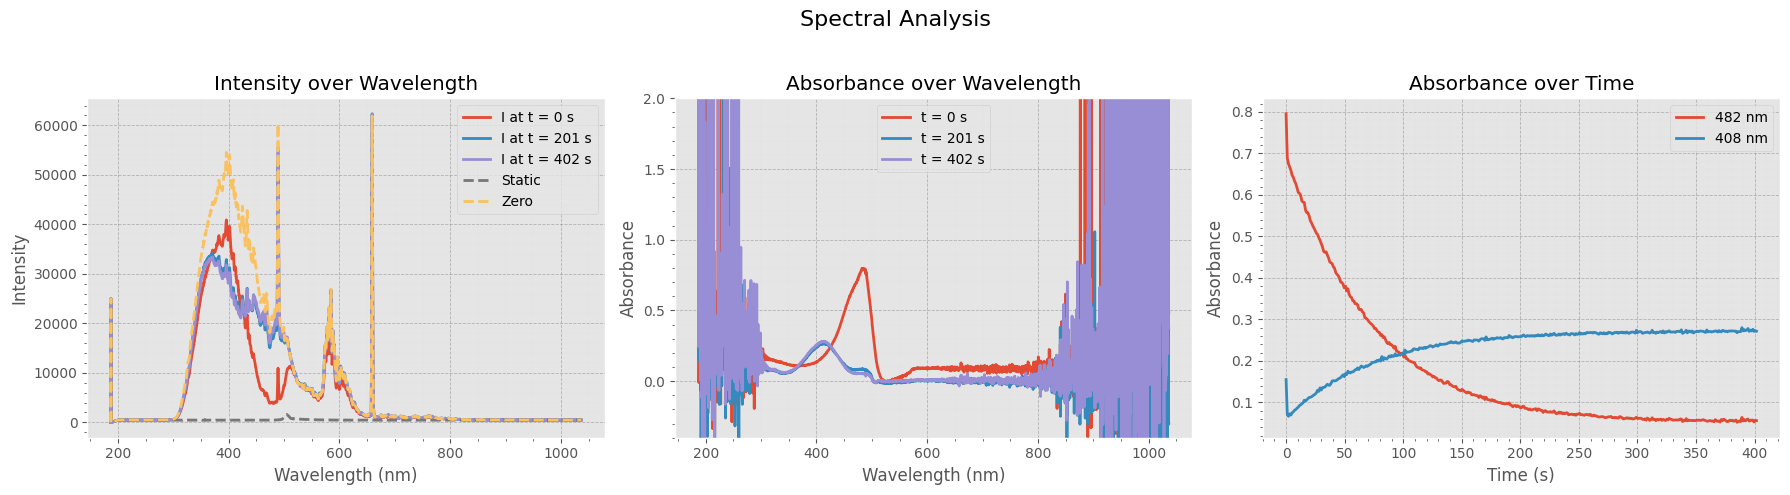

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Set global style
plt.style.use("ggplot")  # Clean style

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Spectral Analysis", fontsize=16)

# --- Intensity Plot ---
axs[0].plot(wavelengths, intensities[0, :], label=f"I at t = {timestamps[0]:.0f} s", linewidth=2)
axs[0].plot(wavelengths, intensities[len(intensities)//2, :], label=f"I at t = {timestamps[len(intensities)//2]:.0f} s", linewidth=2)
axs[0].plot(wavelengths, intensities[-1, :], label=f"I at t = {timestamps[-1]:.0f} s", linewidth=2)
axs[0].plot(wavelengths, static, '--', label="Static", linewidth=2)
axs[0].plot(wavelengths, zero, '--', label="Zero", linewidth=2)
axs[0].set_title("Intensity over Wavelength")
axs[0].set_xlabel("Wavelength (nm)")
axs[0].set_ylabel("Intensity")
axs[0].legend()
axs[0].grid(True, which='major', linestyle='--', linewidth=0.6, color='gray', alpha=0.5, zorder=0)
axs[0].minorticks_on()
axs[0].grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.4, zorder=0)
# --- Absorbance Plot ---
axs[1].plot(wavelengths, absorbance[0, :], label=f"t = {timestamps[0]:.0f} s", linewidth=2)
axs[1].plot(wavelengths, absorbance[len(absorbance)//2, :], label=f"t = {timestamps[len(absorbance)//2]:.0f} s", linewidth=2)
axs[1].plot(wavelengths, absorbance[-1, :], label=f"t = {timestamps[-1]:.0f} s", linewidth=2)
axs[1].set_title("Absorbance over Wavelength")
axs[1].set_xlabel("Wavelength (nm)")
axs[1].set_ylabel("Absorbance")
axs[1].set_ylim(-0.4, 2)
axs[1].legend()
axs[1].grid(True, which='major', linestyle='--', linewidth=0.6, color='gray', alpha=0.5, zorder=0)
axs[1].minorticks_on()
axs[1].grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.4, zorder=0)
# --- Absorbance vs Time Plot ---
WL = [482, 408]
idxs = [np.argmin(np.abs(wavelengths - wl)) for wl in WL]

for i, idx in enumerate(idxs):
    axs[2].plot(timestamps, absorbance[:, idx], label=f"{wavelengths[idx]:.0f} nm", linewidth=2)

axs[2].set_title("Absorbance over Time")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Absorbance")
axs[2].legend()
axs[2].grid(True, which='major', linestyle='--', linewidth=0.6, color='gray', alpha=0.5, zorder=0)
axs[2].minorticks_on()
axs[2].grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.4, zorder=0)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

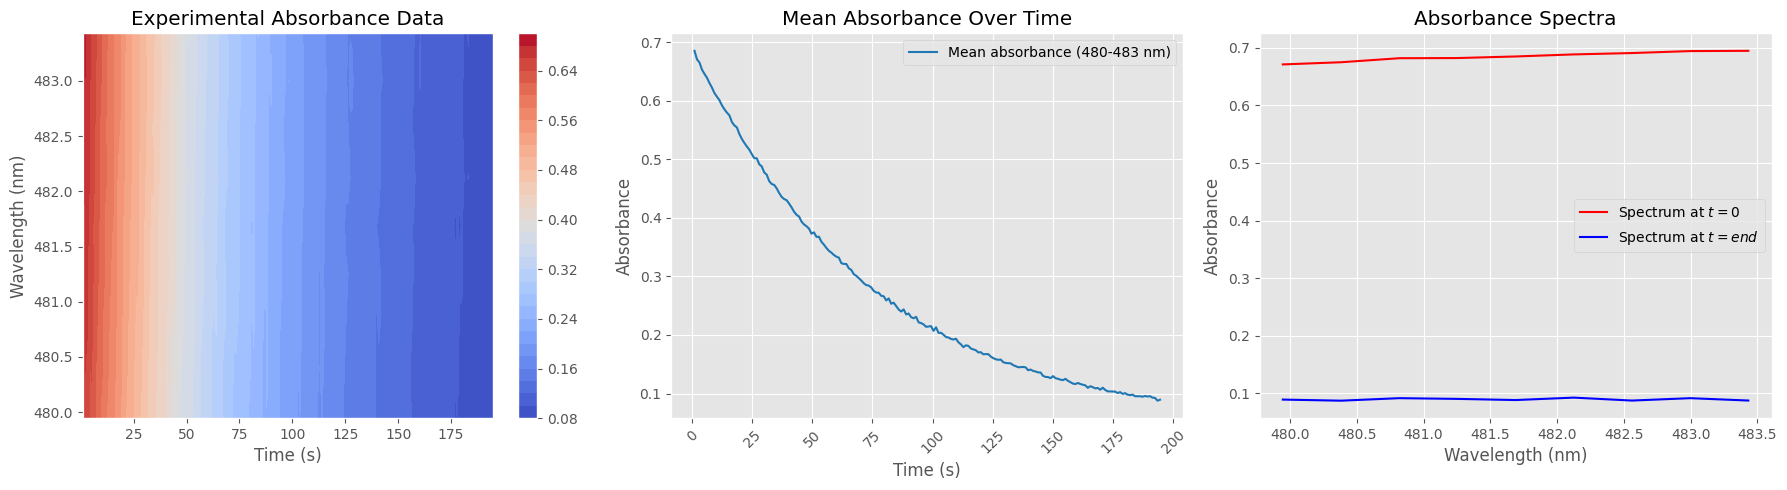

In [4]:
# la premiere mesure doit etre viré

# Define wavelength range of interest
wavelength_range = [480, 484]
idx_range = np.argmin(np.abs(wavelengths[:, None] - wavelength_range), axis=0)

# Extract and normalize absorbance data within the wavelength range
absorbance_subset = absorbance[:, idx_range[0]:idx_range[1]]
# absorbance_subset -= np.min(absorbance_subset)
wavelengths_subset = wavelengths[idx_range[0]:idx_range[1]]

# Filter out specific time points (e.g., first frame and last 300 entries)
# Adjust indices as needed
time_filter_indices = [0] + list(range(-200, 0))
absorbance_subset = np.delete(absorbance_subset, time_filter_indices, axis=0)
timestamps_filtered = np.delete(timestamps, time_filter_indices)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# --- 1. Absorbance Heatmap ---
X, Y = np.meshgrid(timestamps_filtered, wavelengths_subset)
contour = axs[0].contourf(X, Y, absorbance_subset.T, levels=30, cmap="coolwarm")
axs[0].set_title("Experimental Absorbance Data")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Wavelength (nm)")
fig.colorbar(contour, ax=axs[0])

# --- 2. Absorbance Over Time (Averaged Across Wavelength Range) ---
mean_absorbance = np.mean(absorbance_subset, axis=1)
axs[1].plot(timestamps_filtered, mean_absorbance, label=f"Mean absorbance ({wavelengths_subset[0]:.0f}-{wavelengths_subset[-1]:.0f} nm)", color='tab:blue')
axs[1].set_title("Mean Absorbance Over Time")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Absorbance")
axs[1].tick_params(axis="x", rotation=45)
axs[1].legend()
axs[1].grid(True)

# --- 3. Absorbance Spectrum at Start and End ---
axs[2].plot(wavelengths_subset, absorbance_subset[0, :], label="Spectrum at $t=0$", color='red')
axs[2].plot(wavelengths_subset, absorbance_subset[-1, :], label="Spectrum at $t=end$", color='blue')
axs[2].set_title("Absorbance Spectra")
axs[2].set_xlabel("Wavelength (nm)")
axs[2].set_ylabel("Absorbance")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

2.6191470393152487e-05
Reg start
=== Fit Results ===
Parameter 1: 0.0048 ± 0.0000
Parameter 2: 0.3049 ± 0.0230


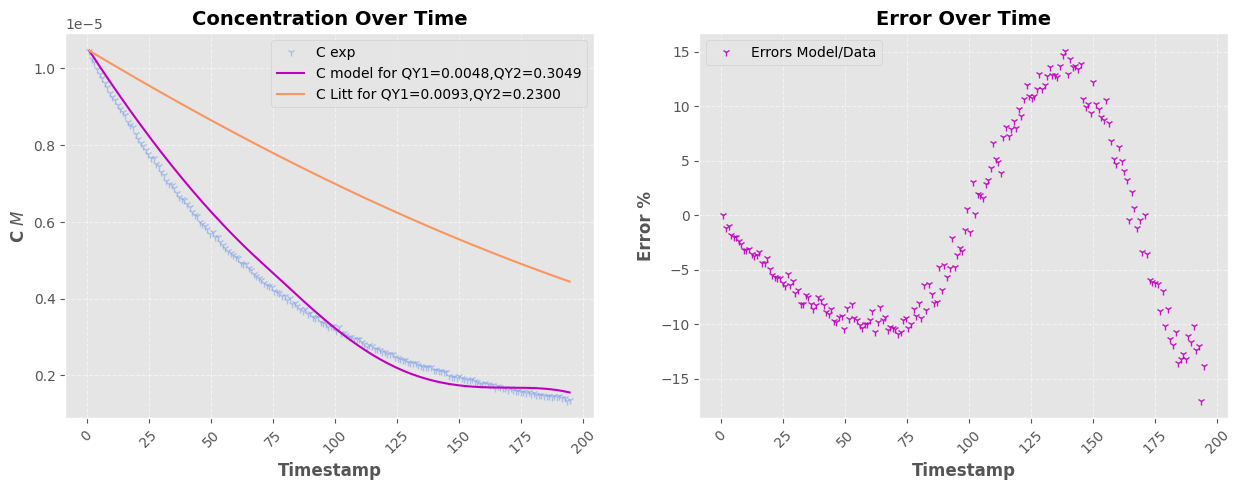

2.000609861845565e-05
Reg start
=== Fit Results ===
Parameter 1: 0.0062 ± 0.0000
Parameter 2: 0.3748 ± 0.0303


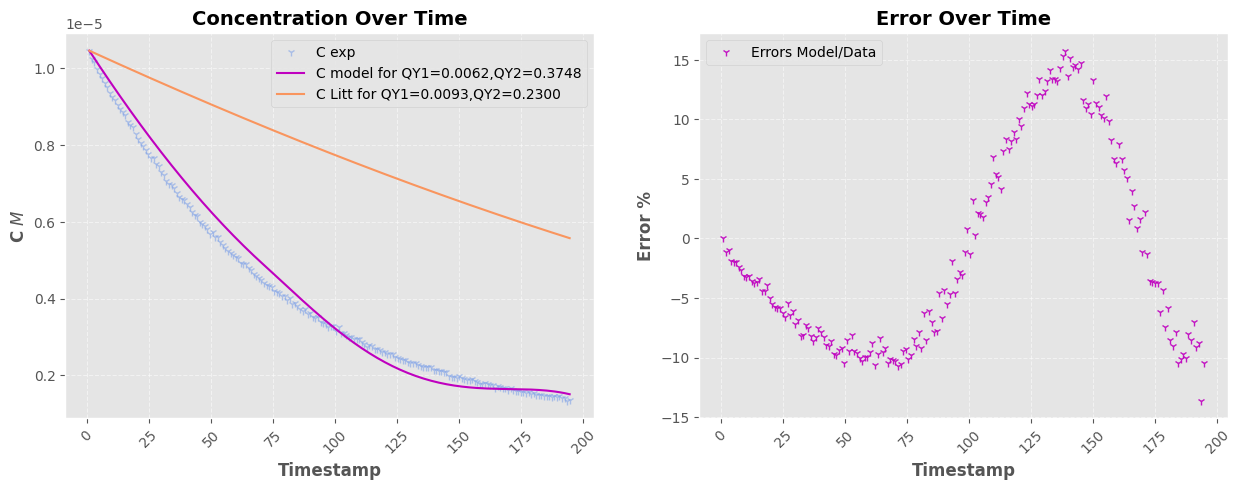

4.7720969181637326e-05
Reg start
=== Fit Results ===
Parameter 1: 0.0026 ± 0.0000
Parameter 2: 0.1632 ± 0.0125


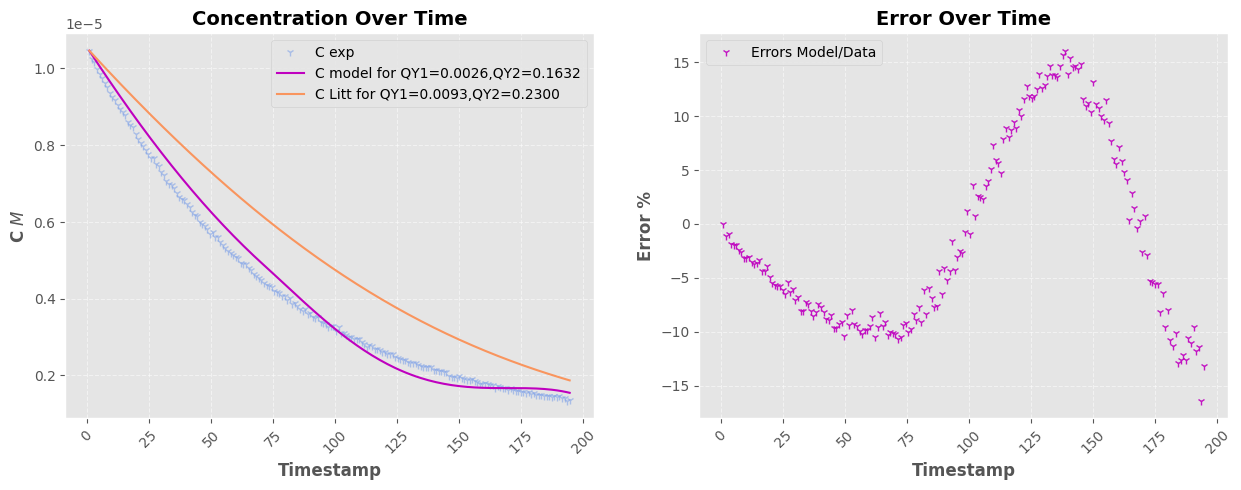

In [5]:
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit

# Physics constants :

h = 6.62607004 * 10 ** (-34)
NA = 6.02214086 * 10 ** (23)
c_vaccum = 299792458
wl = 505 # nm
v = c_vaccum / (wl * 1e-9)
volume = 23e-4 # L
l = 1 # cm
eps_on_482 = 65474
eps_off_482 = 65
I_w_list = [14.27e-3, 10.9e-3, 26e-3]
lpopt=[]
for I_w in I_w_list:
    C_exp = mean_absorbance/(eps_on_482*l)
    
    C0 = C_exp[0]
    
    I_0 = I_w  / (h * v * NA) / volume # mole de photons.L-1
    print(I_0)
    
    def f(t, C_ON, QY_ON2OFF, QY_OFF2ON):
        C_OFF = C0-C_ON
        Iabs_ON =  I_0 * (1 - np.exp(- eps_on_482 * C_ON * l * np.log(10)))
        Iabs_OFF =  I_0 * (1 - np.exp(- eps_off_482 * C_OFF * l * np.log(10)))
        dCCF_deri = -QY_ON2OFF * Iabs_ON + QY_OFF2ON*Iabs_OFF
        return dCCF_deri
    
    def fi(t, q1,q2):
        sol = solve_ivp(f, t_span, y0, args=(q1,q2), t_eval=timestamps_filtered)
        if not sol.success:
            print("⚠️ solve_ivp failed:", sol.message)
            return None  # Retourne None en cas d'échec
        return sol.y.flatten()#+c
    
    
    
    QY1 = 0.2*9.3e-3
    QY2 = 0.2*2.3e-1
    QY1_real = 9.3e-3
    QY2_real = 2.3e-1
    initial_guess = (QY1,QY2)
    bounds = ([1e-4, 1e-4],  [0.1, 1])
    
    t_span = [timestamps_filtered[0], timestamps_filtered[-1]]
    y0 = np.array([C0])
    # y = solve_ivp(f, t_span, y0, args=(QY,), t_eval=timestamps)
    
    print("Reg start")
    popt, pcov = curve_fit(fi, timestamps_filtered, C_exp, p0=initial_guess, bounds=bounds,method="dogbox")
    uncertainties = np.sqrt(np.diag(pcov))
    lpopt.append(popt)
    # Print results
    print("=== Fit Results ===")
    for i, (coef, incert) in enumerate(zip(popt, uncertainties), start=1):
        print(f"Parameter {i}: {coef:.4f} ± {incert:.4f}")
    
    # Compute fitted values
    fitted_values = fi(timestamps_filtered, *popt)
        
    
    fig, a = plt.subplots(1, 2, figsize=(15, 5))
    pastel_colors = ["m", "#f9955e", "#81a3e8"]  # Mauve, orange, sky blue

    # First Plot - Concentration Over Time
    a[0].plot(timestamps_filtered, C_exp, "1", color=pastel_colors[2], label="C exp", alpha=0.6)
    a[0].plot(timestamps_filtered, fitted_values, "-", color=pastel_colors[0], label=f"C model for QY1={popt[0]:0.4f},QY2={popt[1]:0.4f}")
    litt_values = fi(timestamps_filtered, QY1, QY2)
    a[0].plot(timestamps_filtered, litt_values, "-", color=pastel_colors[1], label=f"C Litt for QY1={QY1_real:0.4f},QY2={QY2_real:0.4f}")

    
    a[0].set_xlabel("Timestamp", fontsize=12, fontweight="bold")
    a[0].set_ylabel("C $M$", fontsize=12, fontweight="bold")
    a[0].set_title("Concentration Over Time", fontsize=14, fontweight="bold")
    a[0].tick_params(axis="x", rotation=45)
    a[0].grid(linestyle="--", alpha=0.5)
    a[0].legend()
    
    # Second Plot - Error Over Time
    a[1].plot(timestamps_filtered, (C_exp - fitted_values) * 100 / C_exp, "1", color=pastel_colors[0], label="Errors Model/Data", alpha=0.9)
    
    a[1].set_xlabel("Timestamp", fontsize=12, fontweight="bold")
    a[1].set_ylabel("Error %", fontsize=12, fontweight="bold")
    a[1].set_title("Error Over Time", fontsize=14, fontweight="bold")
    a[1].tick_params(axis="x", rotation=45)
    a[1].grid(linestyle="--", alpha=0.5)
    a[1].legend()
    
    plt.show()

1.5468539277396307e-06 1.3420840890125958e-06


/var/folders/rp/81d4rqnx363g9dhpw9xfl9bh0000gn/T/ipykernel_42963/4179636634.py:27: RuntimeWarning: overflow encountered in exp
  Iabs_ON =  I_0 * (1 - np.exp(- eps_on_482 * C_ON * l * np.log(10)))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/integrate/_ivp/rk.py:109: RuntimeWarning: invalid value encountered in divide
  return norm(self._estimate_error(K, h) / scale)


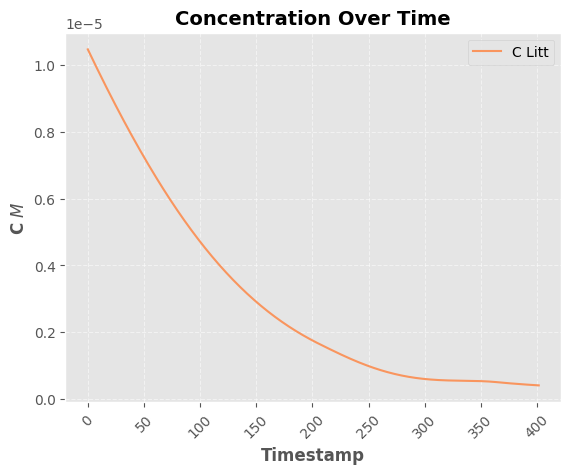

In [6]:
fig, a = plt.subplots()
pastel_colors = ["m", "#f9955e", "#81a3e8"]  # Mauve, orange, sky blue
t_span = [timestamps[0], timestamps[-1]]
def fi(t, q1,q2):
        sol = solve_ivp(f, t_span, y0, args=(q1,q2), t_eval=timestamps)
        if not sol.success:
            print("⚠️ solve_ivp failed:", sol.message)
            return None  # Retourne None en cas d'échec
        return sol.y.flatten()#+c
    
litt_values = fi(timestamps, QY1, QY2)
a.plot(timestamps, litt_values, "-", color=pastel_colors[1], label=f"C Litt")


a.set_xlabel("Timestamp", fontsize=12, fontweight="bold")
a.set_ylabel("C $M$", fontsize=12, fontweight="bold")
a.set_title("Concentration Over Time", fontsize=14, fontweight="bold")
a.tick_params(axis="x", rotation=45)
a.grid(linestyle="--", alpha=0.5)
a.legend()



print(np.min(fitted_values), np.min(C_exp))

plt.show()